In [ ]:
#https://datahack.analyticsvidhya.com/discussions/practice-problem-loan-prediction-iii/67/

In [9]:
from pyforest import *

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.svm import SVC

from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression

sns.set()

<IPython.core.display.Javascript object>

##### Let's use all the features rather than deleting them with minimal preprocessing

In [1]:
df= pd.read_csv(r"train_ctrUa4K.csv")
df.head()

<IPython.core.display.Javascript object>

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df= df.drop("Loan_ID", axis=1)

In [3]:
df["Total_income"]= df["ApplicantIncome"] + df["CoapplicantIncome"]

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [5]:
df["Gender"]= df.Gender.fillna(df.Gender.mode()[0])

df["Married"]= df.Married.fillna(df.Married.mode()[0])

df["Dependents"]= df.Dependents.fillna(df.Dependents.mode()[0])

df["Self_Employed"]= df.Self_Employed.fillna(df.Self_Employed.mode()[0])

In [6]:
df["LoanAmount"]= df.LoanAmount.fillna(df.LoanAmount.mean())

df["Loan_Amount_Term"]= df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

df["Credit_History"]= df.Credit_History.fillna(df.Credit_History.mean())

In [7]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

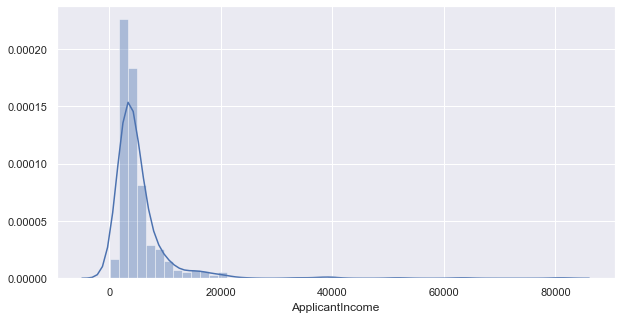

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(df.ApplicantIncome)

<IPython.core.display.Javascript object>

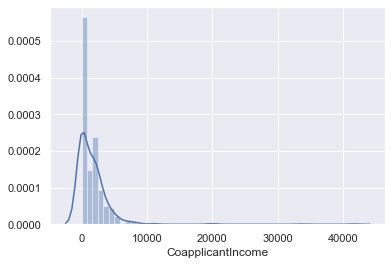

In [11]:
sns.distplot(df.CoapplicantIncome)

<IPython.core.display.Javascript object>

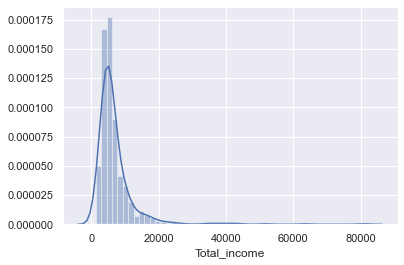

In [13]:
sns.distplot(df.Total_income)

<IPython.core.display.Javascript object>

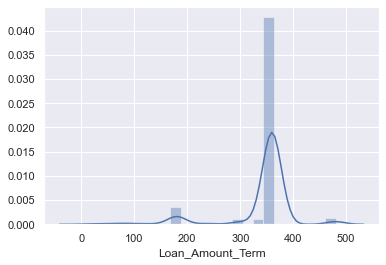

In [14]:
sns.distplot(df.Loan_Amount_Term)

<IPython.core.display.Javascript object>

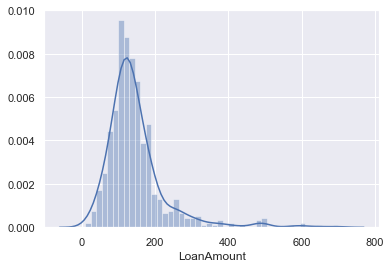

In [15]:
sns.distplot(df.LoanAmount)

In [16]:
from scipy import stats

In [17]:
df["ApplicantIncome"]= np.log(df["ApplicantIncome"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

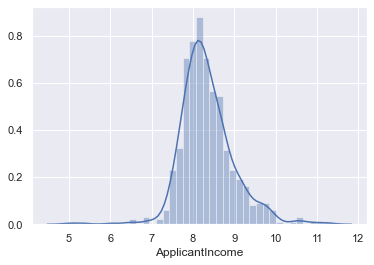

In [18]:
sns.distplot(df.ApplicantIncome)

In [19]:
df["CoapplicantIncome"]= np.log(df["CoapplicantIncome"])

<IPython.core.display.Javascript object>

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,Male,No,0,Graduate,No,8.674026,-inf,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,8.430109,7.318540,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,8.006368,-inf,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,8.699515,-inf,141.000000,360.0,1.0,Urban,Y,6000.0


In [22]:
df["Total_income"]= np.log(df["Total_income"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

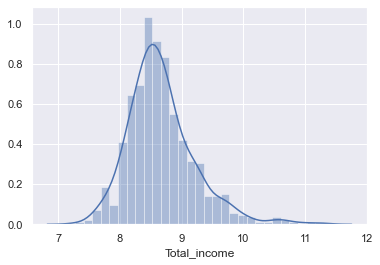

In [23]:
sns.distplot(df.Total_income)

In [24]:
df["LoanAmount"]= np.log(df["LoanAmount"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

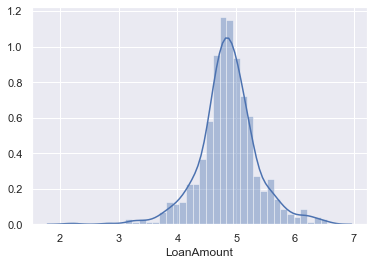

In [25]:
sns.distplot(df.LoanAmount)

In [26]:
df["Loan_Amount_Term"]= np.log(df["Loan_Amount_Term"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

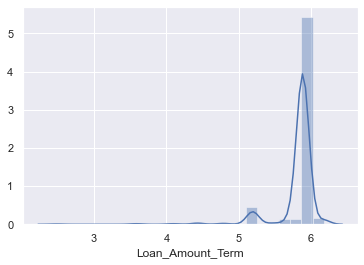

In [27]:
sns.distplot(df.Loan_Amount_Term)

<IPython.core.display.Javascript object>

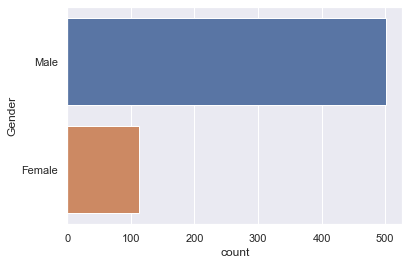

In [28]:
sns.countplot(y="Gender", data=df)

<IPython.core.display.Javascript object>

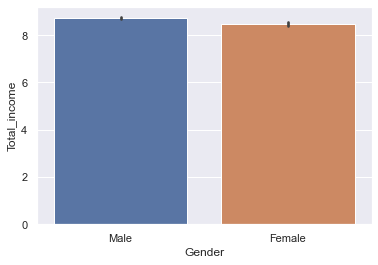

In [30]:
sns.barplot(x="Gender", y= "Total_income", data=df)

In [31]:
df.Loan_Status.replace(to_replace =["Y"],  
                            value =1, inplace=True)

In [32]:
df.Loan_Status.replace(to_replace =["N"],  
                            value =0, inplace=True)

In [33]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
Total_income         float64
dtype: object

In [34]:
df= df.drop("CoapplicantIncome",axis=1)

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,Male,No,0,Graduate,No,8.674026,4.986426,5.886104,1.0,Urban,1,8.674026
1,Male,Yes,1,Graduate,No,8.430109,4.852030,5.886104,1.0,Rural,0,8.714568
2,Male,Yes,0,Graduate,Yes,8.006368,4.189655,5.886104,1.0,Urban,1,8.006368
3,Male,Yes,0,Not Graduate,No,7.856707,4.787492,5.886104,1.0,Urban,1,8.505323
4,Male,No,0,Graduate,No,8.699515,4.948760,5.886104,1.0,Urban,1,8.699515


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
lr= LabelEncoder()

In [38]:
df["Gender"]= lr.fit_transform(df.Gender)
df["Married"]= lr.fit_transform(df.Married)
df["Dependents"]= lr.fit_transform(df.Dependents)
df["Education"]= lr.fit_transform(df.Education)
df["Self_Employed"]= lr.fit_transform(df.Self_Employed)
df["Property_Area"]= lr.fit_transform(df.Property_Area)

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1,0,0,0,0,8.674026,4.986426,5.886104,1.0,2,1,8.674026
1,1,1,1,0,0,8.430109,4.852030,5.886104,1.0,0,0,8.714568
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,0,1,0,7.856707,4.787492,5.886104,1.0,2,1,8.505323
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2,1,8.699515


In [41]:
df_1= df.drop("Loan_Status", axis=1)

In [40]:
scaler= StandardScaler()

In [42]:
X_1= scaler.fit_transform(df_1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

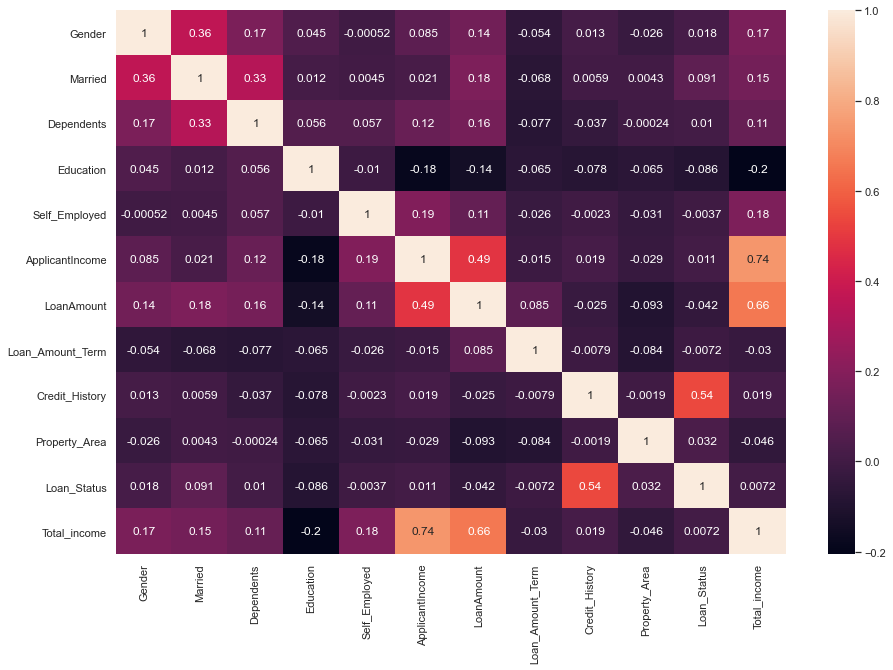

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [43]:
X_1

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.45164045,
         1.22329839,  0.00846848],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.45164045,
        -1.31851281,  0.08290346],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.45164045,
         1.22329839, -1.21736328],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.45164045,
         1.22329839,  0.65369887],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.45164045,
         1.22329839,  0.48516845],
       [-2.11710719, -1.37208932, -0.73780632, ..., -2.41044061,
        -0.04760721, -0.43936693]])

In [44]:
y= np.asarray(df.Loan_Status)

<IPython.core.display.Javascript object>

In [45]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [46]:
X_train, X_test, y_train, y_test= train_test_split(X_1, y, test_size=0.35, random_state=42)

In [47]:
model= SVC()

In [48]:
model.fit(X_train, y_train)

SVC()

In [49]:
y_pred= model.predict(X_test)

In [50]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [52]:
model.score(X_test,y_test), model.score(X_train,y_train)

(0.7906976744186046, 0.8270676691729323)

In [53]:
test= pd.read_csv(r"test_lAUu6dG.csv")
test.head()

<IPython.core.display.Javascript object>

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
test= test.drop("Loan_ID", axis=1)

In [57]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [58]:
test["Gender"]= test.Gender.fillna(test.Gender.mode()[0])

test["Married"]= test.Married.fillna(test.Married.mode()[0])

test["Dependents"]= test.Dependents.fillna(test.Dependents.mode()[0])

test["Self_Employed"]= test.Self_Employed.fillna(test.Self_Employed.mode()[0])

In [59]:
test["LoanAmount"]= test.LoanAmount.fillna(test.LoanAmount.mean())

test["Loan_Amount_Term"]= test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mean())

test["Credit_History"]= test.Credit_History.fillna(test.Credit_History.mean())

In [61]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [62]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


In [64]:
test["Gender"]= lr.fit_transform(test.Gender)

In [66]:
test["Married"]= lr.fit_transform(test.Married)
test["Dependents"]= lr.fit_transform(test.Dependents)
test["Education"]= lr.fit_transform(test.Education)
test["Self_Employed"]= lr.fit_transform(test.Self_Employed)
test["Property_Area"]= lr.fit_transform(test.Property_Area)

In [67]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2


In [68]:
test["Total_income"]= test["ApplicantIncome"] + test["CoapplicantIncome"]

In [69]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2,5720
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2,4576
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2,6800
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2,4886
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2,3276


In [70]:
test["ApplicantIncome"]= np.log(test.ApplicantIncome)

<IPython.core.display.Javascript object>

In [71]:
test["CoapplicantIncome"]= np.log(test.CoapplicantIncome)
test["LoanAmount"]= np.log(test.LoanAmount)
test["Loan_Amount_Term"]= np.log(test.Loan_Amount_Term)
test["Total_income"]= np.log(test.Total_income)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,1,1,0,0,0,8.651724,-inf,4.700480,5.886104,1.000000,2,8.651724
1,1,1,1,0,0,8.031385,7.313220,4.836282,5.886104,1.000000,2,8.428581
2,1,1,2,0,0,8.517193,7.495542,5.337538,5.886104,1.000000,2,8.824678
3,1,1,2,0,0,7.757906,7.842279,4.605170,5.886104,0.825444,2,8.494129
4,1,0,0,1,0,8.094378,-inf,4.356709,5.886104,1.000000,2,8.094378


In [75]:
test= test.drop("CoapplicantIncome", axis=1)

KeyError: "['CoapplicantIncome'] not found in axis"

In [76]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,1,1,0,0,0,8.651724,4.700480,5.886104,1.000000,2,8.651724
1,1,1,1,0,0,8.031385,4.836282,5.886104,1.000000,2,8.428581
2,1,1,2,0,0,8.517193,5.337538,5.886104,1.000000,2,8.824678
3,1,1,2,0,0,7.757906,4.605170,5.886104,0.825444,2,8.494129
4,1,0,0,1,0,8.094378,4.356709,5.886104,1.000000,2,8.094378


In [83]:
test["ApplicantIncome"]= test.ApplicantIncome.astype("float32")
test["LoanAmount"]= test.LoanAmount.astype("float32")

In [88]:
test["Loan_Amount_Term"]= test.Loan_Amount_Term.astype("float32")
test["Total_income"]= test.Total_income.astype("float32")
test["Credit_History"]= test.Credit_History.astype("float32")

In [89]:
test.dtypes

Gender                int32
Married               int32
Dependents            int32
Education             int32
Self_Employed         int32
ApplicantIncome     float32
LoanAmount          float32
Loan_Amount_Term    float32
Credit_History      float32
Property_Area         int32
Total_income        float32
dtype: object